# ARIMA model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from arima_model import (split_data
                         ,plot_pacf_acf
                         ,adfuller_and_diff
                         ,train_predict_plot)

In [3]:
# Incarcarea bazei de date
dataset_train = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)

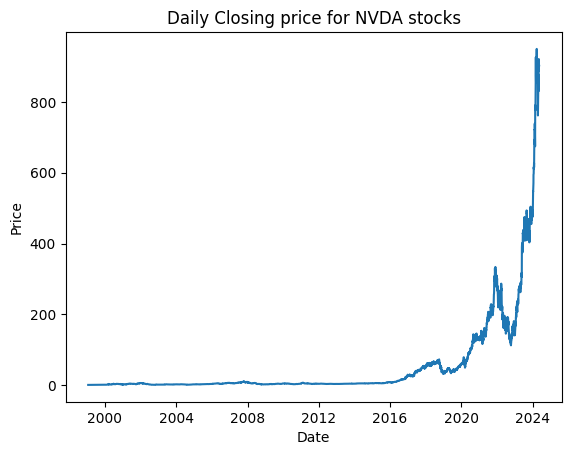

In [4]:
plt.plot(dataset_train.index, dataset_train['Close'])
plt.title('Daily Closing price for NVDA stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

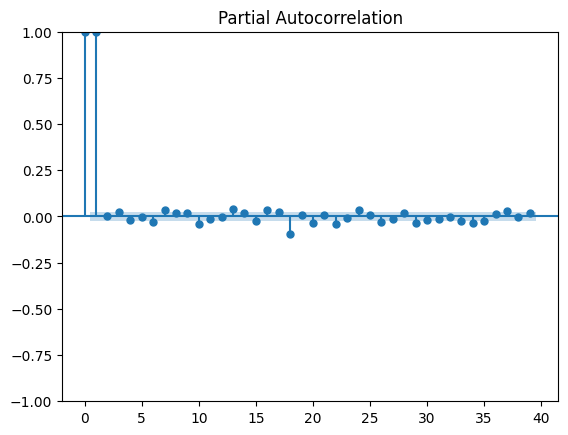

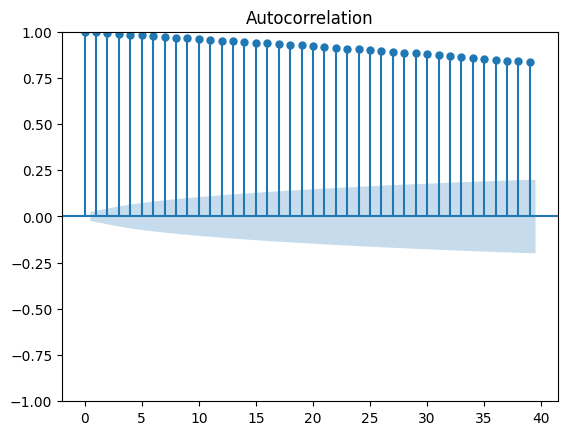

In [5]:
plot_pacf_acf(dataset_train, 'Close')

In [6]:
adfuller_and_diff(dataset_train, 'Close')

Not stationary!
Stationary!
ADF: -10.303522983201983
p-value: 3.324359005581095e-18
Diff: 1


In [7]:
dataset_train.head()

,Open,High,Low,Close,Adj Close,Volume,Close_diff_1
Date,,,,,,,
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415653,51048000,0.042969
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383404,34320000,-0.035156
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382210,24436800,-0.001302
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381015,22752000,-0.001302
1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363098,24403200,-0.019532


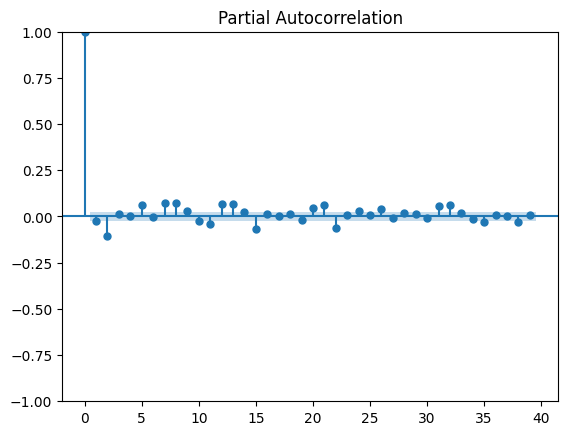

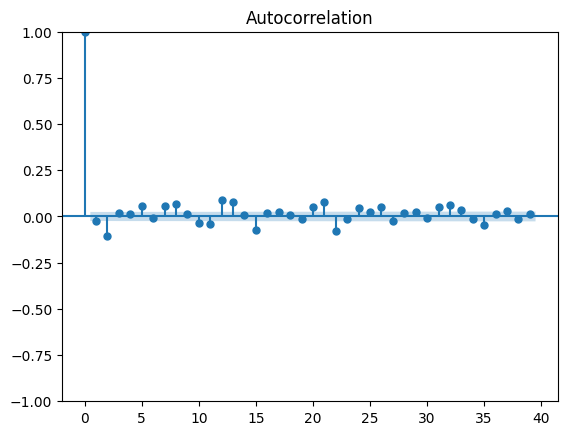

In [8]:
plot_pacf_acf(dataset_train, 'Close_diff_1')

In [9]:
train_dataset, test_dataset = split_data(dataset_train)

d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

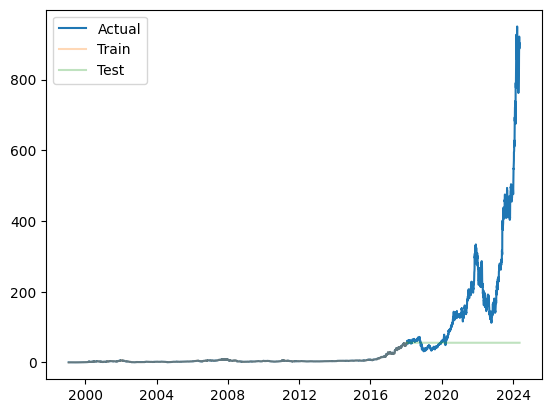

Root mean squared error (RMSE) training: 0.2698524997392327
Root mean squared error (RMSE) training: 233.9648778595231


In [10]:
train_predict_plot(dataset_train, train_dataset, test_dataset, 'Close', (1,1,1))

d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

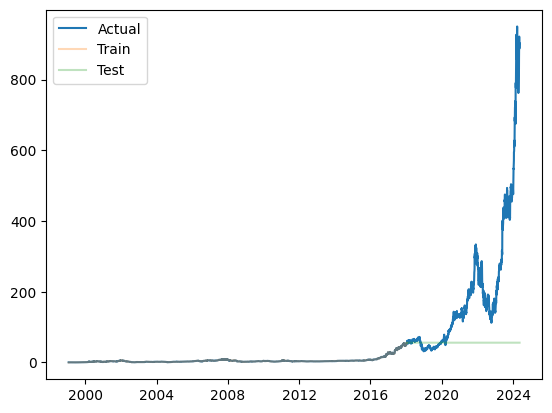

Root mean squared error (RMSE) training: 0.2673662269633693
Root mean squared error (RMSE) training: 233.84396912564682


In [11]:
train_predict_plot(dataset_train, train_dataset, test_dataset, 'Close', (3,1,3))

# LSTM model

In [2]:
# Importam librariile necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from scipy.stats import ttest_rel

In [3]:
# Incarcarea bazei de date
dataset_train = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)

In [34]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6368 entries, 1999-01-22 to 2024-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6368 non-null   float64
 1   High       6368 non-null   float64
 2   Low        6368 non-null   float64
 3   Close      6368 non-null   float64
 4   Adj Close  6368 non-null   float64
 5   Volume     6368 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 348.2 KB


In [19]:

Y_train = dataset_train.sort_index().iloc[:4776][['Close']]
Y_test = dataset_train.sort_index().iloc[4777:][['Close']]

# Ne asiguram ca avem un pret de inchidere al activului financiar
assert 'Close' in dataset_train.columns, "'Close' column is missing in dataset_train"

# Scalarea datelor
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_train_scaled = scaler.fit_transform(Y_train)

# Convertirea datelor scalate intr-un nou DataFrame
dataset_train_scaled = pd.DataFrame(dataset_train_scaled, index=Y_train.index, columns=['Close'])


# Verificarea noului DataFrame
print(dataset_train_scaled.head())


               Close
Date                
1999-01-22  0.001239
1999-01-25  0.002011
1999-01-26  0.001380
1999-01-27  0.001356
1999-01-28  0.001333


# Crearea unui model de training folosind un model de tip LSTM (long short-term memory)

# Train

In [20]:

# Crearea modelului secvential (folosim pretul de inchidere a 180 de zile trecute pentru a prezice pretul de inchidere pentru 30 de zile viitoare)
n_future = 5
n_past = 20

X_train = []
y_train = []

for i in range(n_past, len(dataset_train_scaled) - n_future):
    X_train.append(dataset_train_scaled.iloc[i - n_past:i].values)
    y_train.append(dataset_train_scaled.iloc[i + n_future - 1].values)

X_train, y_train = np.array(X_train), np.array(y_train)

# Definirea modelului
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, 1)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='linear'))

# Compilarea modelului
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Antrenarea modelului
model.fit(X_train, y_train, epochs=10, batch_size=32)




Epoch 1/10


d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0059
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4233e-04
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.8725e-04
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017


In [21]:
n_future

5

In [22]:
# Prezicerea pretului de inchidere viitor
future_predictions = []
current_batch = dataset_train_scaled[-n_past:].values.reshape((1, n_past, 1))

for i in range(n_future):
    future_pred = model.predict(current_batch)[0]
    future_predictions.append(future_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[future_pred]], axis=1)

# Convertim predictiile intr-un nou DataFrame
future_dates = pd.date_range(start=Y_train.index[-1], periods=n_future + 1, inclusive='right')
PREDICTIONS_FUTURE = pd.DataFrame(scaler.inverse_transform(future_predictions), index=future_dates, columns=['Close'])

# Rescalam datele de training la valorile originale
# Convert training predictions back to original scale
PREDICTION_TRAIN = pd.DataFrame(scaler.inverse_transform(model.predict(X_train)), index=Y_train.index[n_past:len(X_train) + n_past], columns=['Close'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
dataset_train_scaled['Close'].tail()

Date
2018-01-08    0.990661
2018-01-09    0.990391
2018-01-10    0.998204
2018-01-11    1.000000
2018-01-12    0.995061
Name: Close, dtype: float64

Calcularea diferentelor dintre setul de train si setul real

In [24]:
PREDICTIONS_FUTURE

,Close
2018-01-13,51.152844
2018-01-14,49.795216
2018-01-15,48.947357
2018-01-16,48.235233
2018-01-17,47.690482


In [25]:
# Extragem pretul din setul real si il aliniem sa fie in acelasi range ca cel din setul de train
# Extract the actual stock prices for the same range as PREDICTION_TRAIN
ACTUAL_TRAIN = Y_train['Close'].iloc[n_past:len(X_train) + n_past]
#Dates = dates_2['Date'].iloc[n_past:len(X_train) + n_past]


# Ne asiguram ca data este aliniata coresounzator
ACTUAL_TRAIN.index = PREDICTION_TRAIN.index

# Calculam diferentele dintre pretul real si pretul prezis
DIFFERENCES_TRAIN = ACTUAL_TRAIN - PREDICTION_TRAIN['Close']

# Converitm noua variabila intr-un Data Frame nou
# Convert the differences to a DataFrame with the same index as the original data
DIFFERENCES_TRAIN_DF = pd.DataFrame({'Pret actual': ACTUAL_TRAIN, 'Pret Train': PREDICTION_TRAIN['Close'], 'Training Price vs. Actual price': DIFFERENCES_TRAIN})

# Verificarea rezultatelor
print(DIFFERENCES_TRAIN_DF)

            Pret actual  Pret Train  Training Price vs. Actual price
Date                                                                
1999-02-22     0.437500    0.596897                        -0.159397
1999-02-23     0.458333    0.601817                        -0.143484
1999-02-24     0.494792    0.612568                        -0.117776
1999-02-25     0.479167    0.632854                        -0.153687
1999-02-26     0.457031    0.646381                        -0.189350
...                 ...         ...                              ...
2017-12-29    48.375000   47.203682                         1.171318
2018-01-02    49.837502   46.891708                         2.945794
2018-01-03    53.117500   47.290573                         5.826927
2018-01-04    53.397499   48.556347                         4.841152
2018-01-05    53.849998   49.137947                         4.712051

[4751 rows x 3 columns]


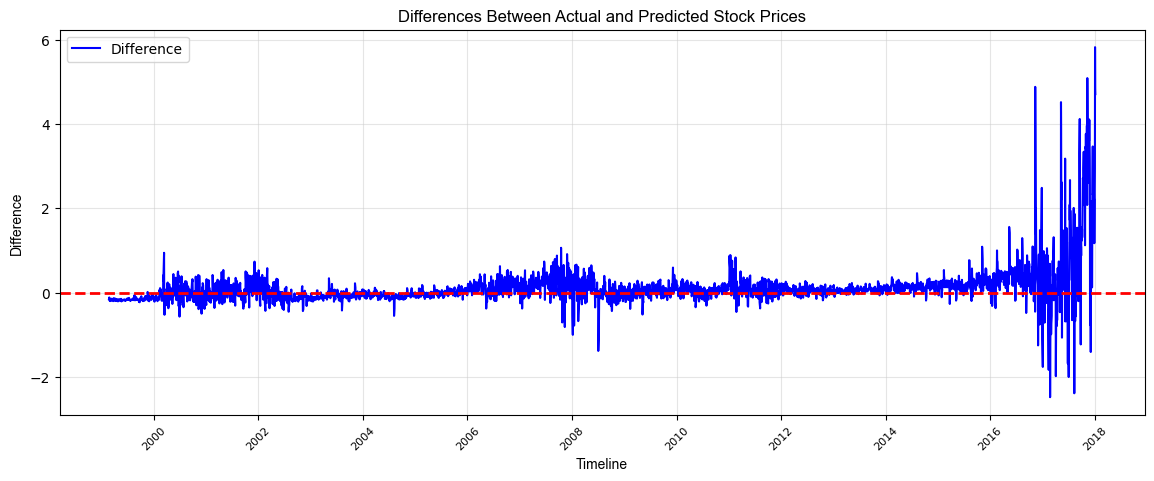

In [26]:


# Create a DataFrame with the actual prices, predicted prices, and differences
DIFFERENCES_TRAIN_DF = pd.DataFrame({
    'Pret actual': ACTUAL_TRAIN,
    'Pret Train': PREDICTION_TRAIN['Close'],
    'Difference': DIFFERENCES_TRAIN
})


# Plot the differences
plt.figure(figsize=(14, 5))
plt.plot(DIFFERENCES_TRAIN_DF.index, DIFFERENCES_TRAIN_DF['Difference'], label='Difference', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)

# Set plot parameters
plt.title('Differences Between Actual and Predicted Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Difference', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.legend()
plt.show()

In [27]:


# Assuming DIFFERENCES_TRAIN_DF is already created
# Extract the actual and predicted values
actual_values = DIFFERENCES_TRAIN_DF['Pret actual']
predicted_values = DIFFERENCES_TRAIN_DF['Pret Train']

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)
print(f"R-squared (R²): {r2}")

# Perform paired t-test
t_stat, p_value = ttest_rel(actual_values, predicted_values)
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")


Mean Absolute Error (MAE): 0.21609628438507172
Mean Squared Error (MSE): 0.21423608170342393
Root Mean Squared Error (RMSE): 0.4628564374656832
Mean Absolute Percentage Error (MAPE): 5.885410528667332%
R-squared (R²): 0.9970333549501957
Paired t-test: t-statistic = 15.977048734737213, p-value = 5.198727621157774e-56


# Test

In [28]:


scaler1 = MinMaxScaler(feature_range=(0, 1))
dataset_train_scaled = scaler1.fit_transform(Y_test)

dataset_train_scaled = pd.DataFrame(dataset_train_scaled, index=Y_test.index, columns=['Close'])

X_test = []
y_test = []

for i in range(n_past, len(dataset_train_scaled) - n_future):
    X_test.append(dataset_train_scaled.iloc[i - n_past:i].values)
    y_test.append(dataset_train_scaled.iloc[i + n_future - 1].values)
# Convertirea datelor scalate intr-un nou DataFrame
X_test, y_test = np.array(X_test), np.array(y_test)

future_predictions = []
current_batch = dataset_train_scaled[-n_past:].values.reshape((1, n_past, 1))

for i in range(n_future):
    future_pred = model.predict(current_batch)[0]
    future_predictions.append(future_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[future_pred]], axis=1)

# Convertim predictiile intr-un nou DataFrame
future_dates = pd.date_range(start=Y_test.index[-1], periods=n_future + 1, inclusive='right')
PREDICTIONS_FUTURE = pd.DataFrame(scaler.inverse_transform(future_predictions), index=future_dates, columns=['Close'])

# Rescalam datele de training la valorile originale
# Convert training predictions back to original scale
PREDICTION_TEST = pd.DataFrame(scaler.inverse_transform(model.predict(X_test)), index=Y_test.index[n_past:len(X_test) + n_past], columns=['Close'])

# Extragem pretul din setul real si il aliniem sa fie in acelasi range ca cel din setul de train
# Extract the actual stock prices for the same range as PREDICTION_TRAIN
ACTUAL_TEST = Y_test['Close'].iloc[n_past:len(X_test) + n_past]
#Dates = dates_2['Date'].iloc[n_past:len(X_train) + n_past]


# Ne asiguram ca data este aliniata coresounzator
ACTUAL_TEST.index = PREDICTION_TEST.index

# Calculam diferentele dintre pretul real si pretul prezis
DIFFERENCES_TEST = ACTUAL_TEST - PREDICTION_TEST['Close']

# Converitm noua variabila intr-un Data Frame nou
# Convert the differences to a DataFrame with the same index as the original data
DIFFERENCES_TEST_DF = pd.DataFrame({'Pret actual': ACTUAL_TRAIN, 'Pret Train': PREDICTION_TRAIN['Close'], 'Training Price vs. Actual price': DIFFERENCES_TRAIN})

# Verificarea rezultatelor
print(DIFFERENCES_TEST_DF)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
            Pret actual  Pret Train  Training Price vs. Actual price
Date                                                                
1999-02-22     0.437500    0.596897                        -0.159397
1999-02-23     0.458333    0.601817                        -0.143484
1999-02-24     0.494792    0.612568                        -0.117776
1999-02-25     0.479167    0.632854                        -0.153687
1999-02-26     0.457031    0.646381                        -0.189350
...                 ...         ...                              ...
2017-12-29    48.375000   47.203682                         1.171318
2018-01-02    49.837502   46.891708                         2.945794
2018-01-03    53.117500   47.290573                         5.826927
2018-01-04   

# Plotarea rezultatelor

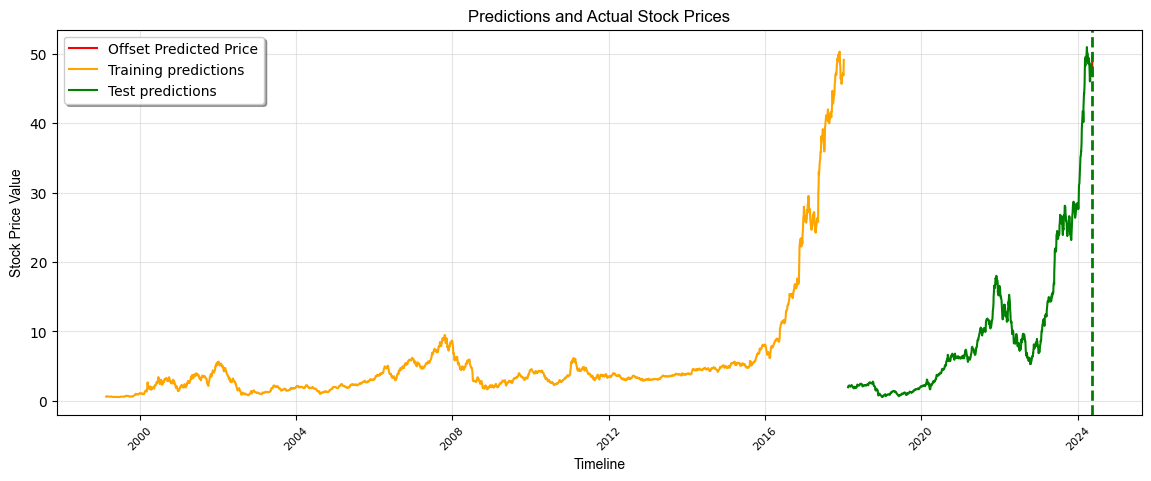

In [29]:
# Setam paramterii graficului
rcParams['figure.figsize'] = 14, 5

# Setarea unei date pentru inceputul graficului
START_DATE_FOR_PLOTTING = dt.datetime.strptime('2018-06-01', '%Y-%m-%d').date()

# Ne asiguram ca indecsii sunt de tip date
PREDICTIONS_FUTURE.index = pd.to_datetime(PREDICTIONS_FUTURE.index)
PREDICTION_TRAIN.index = pd.to_datetime(PREDICTION_TRAIN.index)
dataset_train.index = pd.to_datetime(dataset_train.index)

# Grafic
plt.figure(figsize=(14, 5))
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='r', label='Offset Predicted Price')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN['Close'], color='orange', label='Training predictions')
plt.plot(PREDICTION_TEST.index, PREDICTION_TEST['Close'], color='green', label='Test predictions')
#plt.plot(dataset_train.index, dataset_train['Close'], color='b', label='Actual Stock Price')

plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predictions and Actual Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()


Dataset Train Date Range: 1999-01-22 00:00:00 to 2024-05-13 00:00:00
Prediction Train Date Range: 1999-02-22 00:00:00 to 2018-01-05 00:00:00
Predictions Future Date Range: 2024-05-14 00:00:00 to 2024-05-18 00:00:00


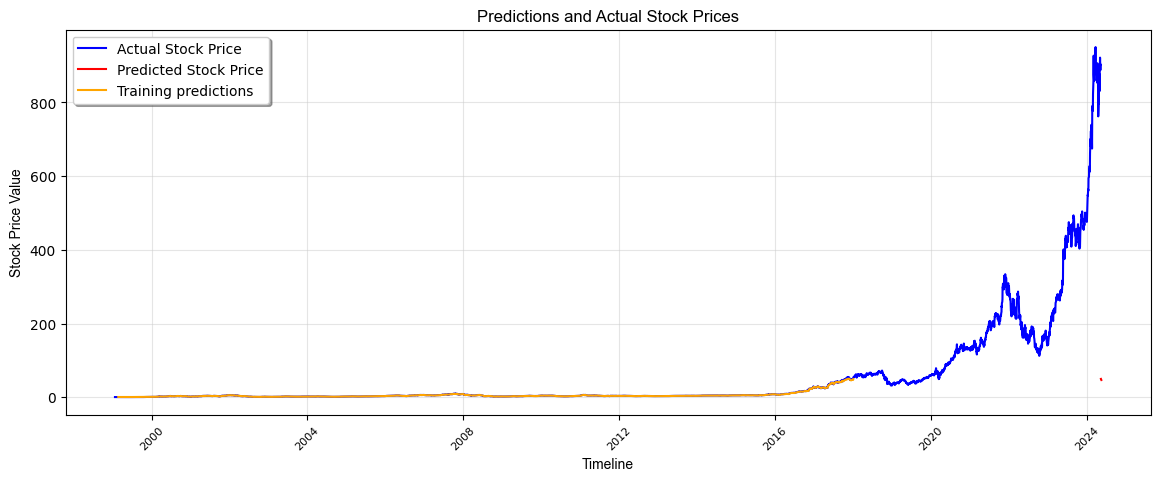

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime as dt

# Ensure START_DATE_FOR_PLOTTING is a pd.Timestamp
START_DATE_FOR_PLOTTING = pd.Timestamp(dt.datetime.strptime('2012-06-01', '%Y-%m-%d').date())

# Check the date range for dataset_train, PREDICTION_TRAIN, and PREDICTIONS_FUTURE
print("Dataset Train Date Range:", dataset_train.index.min(), "to", dataset_train.index.max())
print("Prediction Train Date Range:", PREDICTION_TRAIN.index.min(), "to", PREDICTION_TRAIN.index.max())
print("Predictions Future Date Range:", PREDICTIONS_FUTURE.index.min(), "to", PREDICTIONS_FUTURE.index.max())

# Ensure START_DATE_FOR_PLOTTING is within the range of dataset_train
START_DATE_FOR_PLOTTING = max(START_DATE_FOR_PLOTTING, dataset_train.index.min())

# Plot parameters
rcParams['figure.figsize'] = 14, 5

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(dataset_train.index, dataset_train['Close'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN['Close'], color='orange', label='Training predictions')


#plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predictions and Actual Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()
